# ANALIZA PODATKOV: AVTO-MOTO DIRKE

Za projektno nalogo sem si izbrala analizo podatkov avto-moto dirk od začetkov beleženja uradnih dirk pa vse do konca oktobra 2018. Zbrala sem podatke o vseh dirkah, ki so potekale in bile zabeležene. Za vsako dirko sem zajela uradno ime dirke, prizorišče dirke, datum, prvenstvo in zmagovalca, če je le ta seveda sploh bil.

Projektna naloga bo strukturirana iz dveh delov. 
Prvi del, bo predstavil zbrane podatke o dirkah. Tu bo vključena predvsem:
        - število dirk v posameznih državah,
        - statistika po posameznih prvenstvih in 
        - priljubljenost dirk po različnih časovnih obdobjih.
V drugem delu, se bom bolj posvetila dirkačem. Predstavila bom:
        - uspešnosti dirkačev v različnih kategorijah,
        - uspešnost dirkačev v različnih državah ter
        - uspešnost dirkačev v različnih obdojih.
Ker je podatkov veliko, se bom pri vseh osredotočila le na tiste, ki jih imajo največ, saj s tem lahko pridobimo tudi najbolj realne podatke in primerjave.

## Podatki

In [196]:
import pandas as pd
import matplotlib.pyplot as mat
%matplotlib inline

dirke = pd.read_csv('avto-moto dirke csvji\dirke.csv', index_col='ime')

pd.options.display.max_rows = 20

Za začetek si oglejmo zbrane podatke.

In [152]:
dirke

,dirkalisce,drzava,leto,prvenstvo,zmagovalec
ime,,,,,
Mexican Grand Prix,Gran Premio de Mexico,MEX,2018,F1 World Championship,Max Verstappen
Australian MotoGP,Michelin Australian Motorcycle Grand Prix,AUS,2018,World Motorcycle Championship,Maverick Vinales
Martinsville NASCAR,First Data 500,USA,2018,Monster Energy NASCAR Cup,Joey Logano
Suzuka WTCR,Race of Japan - Race 2,JPN,2018,World Touring Car Cup,Rob Huff
Suzuka WTCR,Race of Japan - Race 3,JPN,2018,World Touring Car Cup,Gabriele Tarquini
Suzuka Super Formula,NaN,JPN,2018,Japanese Super Formula Championship,Naoki Yamamoto
Suzuka WTCR,Race of Japan - Race 1,JPN,2018,World Touring Car Cup,Kevin Ceccon
Japanese MotoGP,Motul Grand Prix of Japan,JPN,2018,World Motorcycle Championship,Marc Marquez
Kansas NASCAR,Hollywood Casino 400,USA,2018,Monster Energy NASCAR Cup,Chase Elliott


## PRILJUBLJENOST DIRK

### Dirke v različnih državah

Najprej se posvetimo dirkam in kje se jih je odvilo največ, glede na državo in tudi glede na obdobje.

In [153]:
dirke["drzava"]

ime
Mexican Grand Prix               MEX
Australian MotoGP                AUS
Martinsville NASCAR              USA
Suzuka WTCR                      JPN
Suzuka WTCR                      JPN
Suzuka Super Formula             JPN
Suzuka WTCR                      JPN
Japanese MotoGP                  JPN
Kansas NASCAR                    USA
United States Grand Prix         USA
                                ... 
Nice-Castellane-Nice             FRA
Paris-Amsterdam                  FRA
Paris-Bordeaux                   FRA
Marseille-Hyeres-Nice            FRA
Paris-Trouville                  FRA
Paris-Dieppe                     FRA
Marseille-La Turbie-Marseille    FRA
Paris-Marseille                  FRA
Paris-Bordeaux                   FRA
Paris-Rouen                      FRA
Name: drzava, Length: 12863, dtype: object

In [187]:
dirke.groupby('drzava').size().sort_values(ascending=False)

drzava
USA    5563
DEU     995
GBR     928
ITA     882
FRA     726
ESP     475
BEL     393
CAN     288
ZAF     211
NLD     205
       ... 
POL       4
URY       3
ROU       3
THA       3
IND       3
NOR       3
HKG       3
COL       2
CHL       1
CUW       1
Length: 57, dtype: int64

Dirke so bile organizirane v 57-ih različnih državah po svetu. Največ dirk do sedaj se je odvilo v Združenih državah Amerike (USA), z veliko manj dirkami ji sledita Nemčija (DEU) in Velika Britanija (GBR). Kurakao (CUW) in Čile (CHL) sta gostili samo eno dirko, z eno dirko več jima sledi Kolumbija (COL).

### Dirkanje v različnih obdobjih

In [157]:
dirke['desetletje'] = 10 * (dirke.leto // 10)

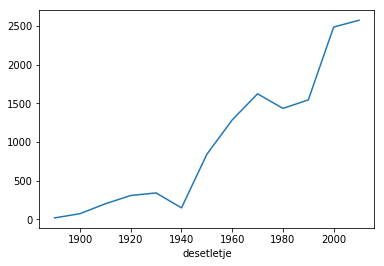

In [158]:
dirke.groupby('desetletje').size().plot()

Zgornji graf kaže odvisnost med obdobjem (desetletjem) in številom dirk. Opazimo, da število dirk skozi leta skoraj vedno narašča. Rahla padca sta bila le pred letom 1940, kar bi morda celo pripisala temu, da se je bližala 2. svetovna vojna, ter okoli leta 1970. V zadnjem desetletju, pa se je odvilo več kot 2500 dirk.

### Dirkanje v različnih prvenstvih

In [159]:
dirke.groupby('prvenstvo').size().sort_values(ascending=False).head(10)

prvenstvo
Non-championship                      1093
F1 World Championship                  992
NASCAR Grand National                  973
World Motorcycle Championship          649
Winston Cup                            567
AAA National Championship              493
Winston Cup Grand National             465
Deutsche Tourenwagen Meisterschaft     449
European F3 Championship               338
Sprint Cup                             324
dtype: int64

Če razvrstimo dirke po kategorijah opazimo, da je bilo največ dirk odpeljanih v kategoriji Formule 1 (pri čemer seveda zanemarimo kategorijo, kjer prvenstvo ni določeno (Non-championship)). V Formuli 1 je bilo odpeljanih 992 dirk, z nekoliko manj dirkami ji sledi NASCAR in potem še Svetovno prvenstvo v motociklizmu (danes bolj znano kot MotoGP).

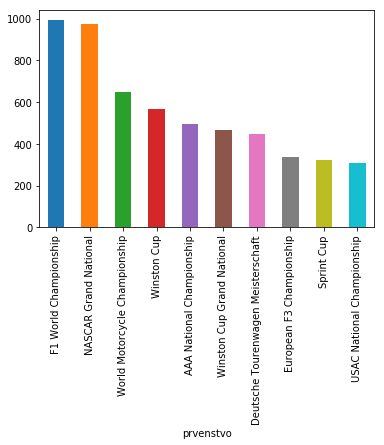

In [160]:
dirke.groupby('prvenstvo').size().sort_values(ascending=False)[1:11].plot.bar()

Za te 3 največja prvenstva, si oglejmo še, v katerih državah so njihove dirke najpogosteje odpeljane.

In [161]:
drzava_prvenstvo = pd.read_csv('avto-moto dirke obdelani podatki\drzava-prvenstvo.csv')

F1 = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'F1 World Championship']
NASCAR = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'NASCAR Grand National']
MotoGP = drzava_prvenstvo[drzava_prvenstvo.prvenstvo == 'World Motorcycle Championship']

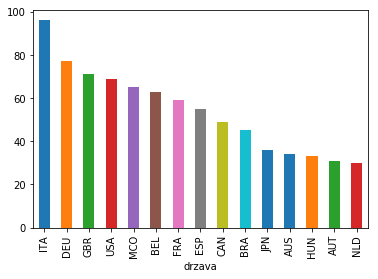

In [162]:
F1.groupby('drzava').size().sort_values(ascending=False).head(15).plot.bar()

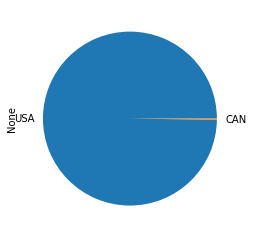

In [163]:
NASCAR.groupby('drzava').size().sort_values(ascending=False).plot.pie()

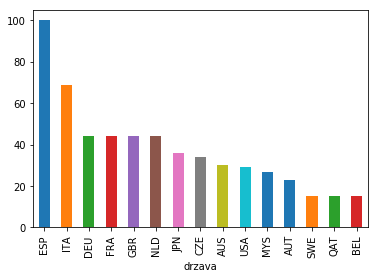

In [164]:
MotoGP.groupby('drzava').size().sort_values(ascending=False).head(15).plot.bar()

Ugotovili smo, da je bila Formula 1 odpeljana največkrat v Italiji, NASCAR v ZDA (tudi sicer je NASCAR potekal le v ZDA in Kanadi), Svetovno prvenstvo v motociklizmu pa je največkrat bilo v Španiji. Podatki niso presenetljivi, saj je je največja gledanost in zanimanje za te kategorije prav v državah, v katerih je tudi največ dirk.

## USPEŠNOST DIRKAČEV

V tem delu se želim bolj posvetiti zmagovalcem dirk.

In [188]:
dirke.groupby(['zmagovalec', 'prvenstvo']).size().sort_values(ascending=False)

zmagovalec                 prvenstvo                               
Richard Petty              NASCAR Grand National                       118
Michael Schumacher         F1 World Championship                        91
Valentino Rossi            World Motorcycle Championship                89
Richard Petty              Winston Cup Grand National                   81
Lewis Hamilton             F1 World Championship                        71
Cale Yarborough            Winston Cup Grand National                   69
Darrell Waltrip            Winston Cup Grand National                   67
Jeff Gordon                Winston Cup                                  64
Bobby Allison              Winston Cup Grand National                   63
Dale Earnhardt             Winston Cup                                  61
                                                                      ... 
Kelly Collins              Paul Edwards                                  1
Keith Holland              Shell

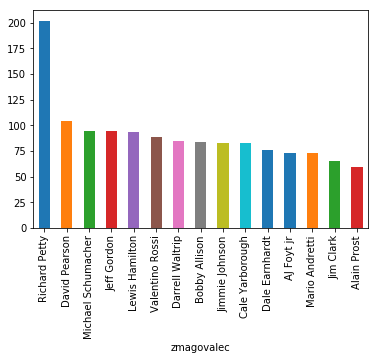

In [166]:
dirke.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkači (dirkači z največ zmagami) so Richard Petty, Michael Schumacher in Valentino Rossi. Razberemo pa lahko tudi, da je med 12863 zabeleženih dirk kar 1936 različnih zmagovalcev. Če dobro pogledamo prvo tabelo vidimo, da je dirkač Richard Petty nastopal celo v dveh prvenstvih, torej je skupno zmagal kar 199-krat, zato močno odstopa od drugih.

In [193]:
brez_zmagovalca = dirke[dirke.zmagovalec == 'Ni zmagovalca']

In [194]:
brez_zmagovalca

,dirkalisce,drzava,leto,prvenstvo,zmagovalec,desetletje
ime,,,,,,
British MotoGP,GoPro British Grand Prix,GBR,2018,World Motorcycle Championship,Ni zmagovalca,2010
Autopolis Super Formula,NaN,JPN,2018,Japanese Super Formula Championship,Ni zmagovalca,2010
Monza GP3,NaN,ITA,2017,GP3 Series,Ni zmagovalca,2010
Abu Dhabi GP2,NaN,ARE,2015,GP2 Series,Ni zmagovalca,2010
Slovakiaring WTCC,NaN,SVK,2014,World Touring Car Championship,Ni zmagovalca,2010
Norisring DTM,NaN,DEU,2013,Deutsche Tourenwagen Meisterschaft,Ni zmagovalca,2010
Norisring European F3,NaN,DEU,2012,F3 Euroseries,Ni zmagovalca,2010
Norisring European F3,NaN,DEU,2012,European F3 Championship,Ni zmagovalca,2010
Malaysian MotoGP,Shell Advance Malaysian Motorcycle Grand Prix,MYS,2011,World Motorcycle Championship,Ni zmagovalca,2010


In [195]:
brez_zmagovalca.count()

dirkalisce     6
drzava        17
leto          17
prvenstvo     17
zmagovalec    17
desetletje    17
dtype: int64

Zanimivo je, da obstajajo tudi dirke, ki sploh nimajo zmagovalca. Vseh skupaj jih je 17.

Poglejmo sedaj še uspešnost dirkačev v posameznih kategorijah, v posameznih letih in v posameznih državah.

### Dirkači posameznih kategorij

In [167]:
prvenstvo_zmagovalec = pd.read_csv('avto-moto dirke obdelani podatki\prvenstvo-zmagovalec.csv')

F1_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'F1 World Championship']
NASCAR_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'NASCAR Grand National']
MotoGP_z = prvenstvo_zmagovalec[prvenstvo_zmagovalec.prvenstvo == 'World Motorcycle Championship']

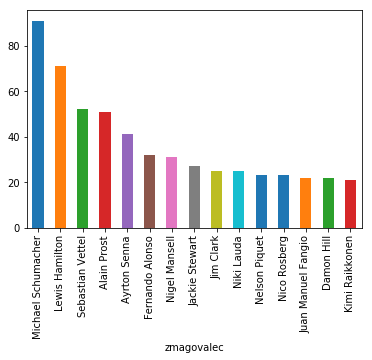

In [168]:
F1_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkač Formule 1 je Michael Schumacher, za njim sta Lewis Hamilton (aktualni svetovni prvak) in Sebastian Vettel.

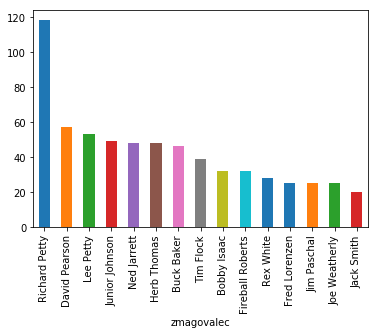

In [169]:
NASCAR_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkaš NASCAR-ja je Richard Petty, sledita pa mu David Pearson in Lee Petty. Trenutnega aktualnega prvaka Joeya Logana pa ni med najboljših 15 dirkačev.

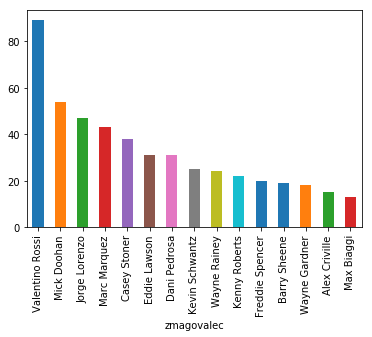

In [170]:
MotoGP_z.groupby('zmagovalec').size().sort_values(ascending=False).head(15).plot.bar()

Najuspešnejši dirkač vseh časov v kategoriji MotoGP je Valentino Rossi, drugi je Mick Doohan in treti Jorge Lorenzo. aktualni svetovni prvak Marc Marquez je četri najuspešnejši.

### Najuspešnejši dirkači po obdobjih

In [177]:
dirke.sort_values('zmagovalec').groupby(['desetletje', 'zmagovalec']).size().sort_values(ascending=False).head(20)

desetletje  zmagovalec        
1960        Richard Petty         103
1970        Richard Petty          89
2000        Valentino Rossi        77
1960        Jim Clark              65
2010        Lewis Hamilton         60
1980        Darrell Waltrip        57
2000        Michael Schumacher     56
1960        David Pearson          56
1990        Mick Doohan            54
1970        Cale Yarborough        52
1950        Herb Thomas            49
1990        Jeff Gordon            49
1950        Lee Petty              47
2000        Jimmie Johnson         47
1970        David Pearson          47
2010        Sebastian Vettel       47
1960        Ned Jarrett            46
            John Love              46
            AJ Foyt jr             44
2010        Felix Rosenqvist       43
dtype: int64

Vidimo, da je imel vsak dirkač svoja zlata leta, ko je nabiral zmage. Richard Petty je svoj uspeh žel kar dve desetletji.

In [116]:
dirke.groupby(['desetletje', 'zmagovalec']).size()

desetletje  zmagovalec               
1890        &quot;Alfred Levegh&quot;     2
            Albert Lemaitre               2
            Albert de Dion                2
            Anthony                       1
            Emile Levassor                1
            Emile Mayade                  1
            Fernand Charron               3
            Gaston Chasseloup Laubat      1
            Gilles Hourgieres             1
            Leonce Girardot               1
                                         ..
2010        Will Power                   31
            Will Stevens                  2
            Yann Clairay                  1
            Yann Ehrlacher                3
            Yelmer Buurman                7
            Yuhi Sekiguchi                5
            Yuji Kunimoto                 2
            Yvan Muller                  41
            Zach Veach                    6
            Zachary Claman de Melo        1
Length: 2559, dtype: int64

[]

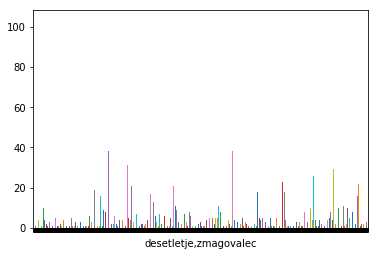

In [176]:
(dirke.groupby(['desetletje', 'zmagovalec']).size()).plot.bar().set_xticklabels([])

Abcisna os grafa je urejena tudi po desetletjih, tako lahko vidimo, da so na vsake toliko prišla obdobja nekaterih dirkačev, ki po zmagah močno odstopajo od drugih.

In [178]:
prvo_obdobje = dirke[(dirke.leto >= 1960) & (dirke.leto < 1980)]
drugo_obdobje = dirke[(dirke.leto >= 1980) & (dirke.leto < 2000)]
tretje_obdobje = dirke[(dirke.leto >= 2000)]

In [184]:
prvo_obdobje.groupby(['zmagovalec', 'prvenstvo']).size().sort_values(ascending=False).head(10)

zmagovalec       prvenstvo                         
Richard Petty    NASCAR Grand National                 118
                 Winston Cup Grand National             71
AJ Foyt jr       USAC National Championship             59
David Pearson    NASCAR Grand National                  57
Cale Yarborough  Winston Cup Grand National             49
Ned Jarrett      NASCAR Grand National                  46
David Pearson    Winston Cup Grand National             46
Dave Charlton    South African Drivers Championship     46
John Love        South African Drivers Championship     45
Bobby Allison    Winston Cup Grand National             38
dtype: int64

In [185]:
drugo_obdobje.groupby(['zmagovalec', 'prvenstvo']).size().sort_values(ascending=False).head(10)

zmagovalec          prvenstvo                         
Dale Earnhardt      Winston Cup                           59
Mick Doohan         World Motorcycle Championship         54
Alain Prost         F1 World Championship                 51
Jeff Gordon         Winston Cup                           49
Rusty Wallace       Winston Cup                           49
Darrell Waltrip     Winston Cup Grand National            45
Ayrton Senna        F1 World Championship                 41
Michael Schumacher  F1 World Championship                 35
Nigel Mansell       F1 World Championship                 31
Klaus Ludwig        Deutsche Tourenwagen Meisterschaft    31
dtype: int64

In [186]:
tretje_obdobje.groupby(['zmagovalec', 'prvenstvo']).size().sort_values(ascending=False).head(10)

zmagovalec          prvenstvo                     
Valentino Rossi     World Motorcycle Championship     89
Lewis Hamilton      F1 World Championship             71
Michael Schumacher  F1 World Championship             56
Sebastian Vettel    F1 World Championship             52
Yvan Muller         World Touring Car Championship    48
Jorge Lorenzo       World Motorcycle Championship     47
Jimmie Johnson      Sprint Cup                        47
Marc Marquez        World Motorcycle Championship     43
Casey Stoner        World Motorcycle Championship     38
Kyle Busch          Sprint Cup                        34
dtype: int64

V zgornjih treh tabelah so našteti najuspešnejši dirkači v posameznih obdobjih. Posvetila sem se le letom po 1960, ko je tudi število dirk na leto zrastlo nad 1000, torej to so obdobja, ko je avto-moto šport zares začel svoj vzpon v priljubljenosti.
V prvem obdobju med leti 1960 in 1980 je nedvomno najuspešnejši dirkač Richard Petty, ki je več kot uspešno nastopal v kar dveh prvenstvih. Med leti 1980 in 2000 so bili po številu zmag najuspešnejši Dale Earnhardt, Mick Doohan in Alain Prost. Vsak pa je nastopal v svojem prvenstvu. Od začetka novega tisočletja pa do danes je najuspečnejši dirkač Valentino Rossi (MotoGP), sledi mu Lewis Hamilton (Formula 1), ki sta za razliko od tretjega najuspešnejšega dirkača, še aktivna. Na tretjem mestu je torej že nekaj časa upokojeni dirkač Formule 1 Michael Schumacher. Njegovi uspehi pa so očitno tako veliki, da je kljub temu, da že dolgo ne dirka več, vseeno tretji najuspešnejši dirkač zadnjih 19 let.

### Uspehi dirkačev v različnih državah

In [77]:
drzava_zmagovalec = pd.read_csv('avto-moto dirke obdelani podatki\drzava-zmagovalec.csv')

Zda = drzava_zmagovalec[drzava_zmagovalec.drzava == 'USA']
Nem = drzava_zmagovalec[drzava_zmagovalec.drzava == 'DEU']
Ang = drzava_zmagovalec[drzava_zmagovalec.drzava == 'GBR']
Ita = drzava_zmagovalec[drzava_zmagovalec.drzava == 'ITA']
Spa = drzava_zmagovalec[drzava_zmagovalec.drzava == 'ESP']

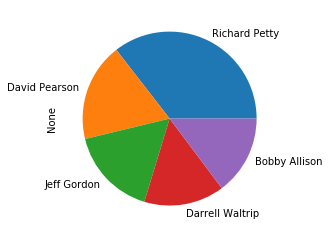

In [78]:
Zda.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

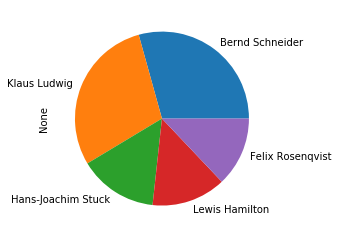

In [79]:
Nem.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

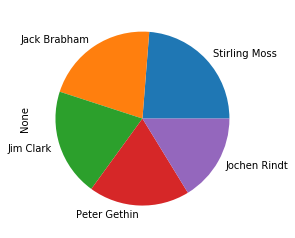

In [80]:
Ang.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

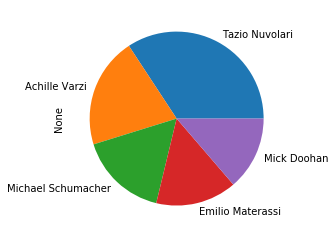

In [81]:
Ita.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

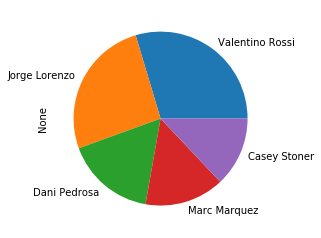

In [82]:
Spa.groupby('zmagovalec').size().sort_values(ascending=False).head(5).plot.pie()

Pregledala sem statistiko petih najboljših dirkačev v izbranih petih državah (Združene države Amerike, Nemčija, Anglija, Italija in Španija). Vidimo lahko, da velikih odstopanj ni, da bi bili nekateri dirkači velik boljši v določenih državah. Treba pa je povdariti, da če se odvijajo dirke nekega prvenstva v malo različnih državah, je seveda toliko večja verjetnost, da bo dirkač, ki dirka v tej kategoriji uspešen v eni izmed teh držav. Kot primer izpostavljenega, lahko vidimo dirkača NASCARja Richarda Pettya, ki je nastopal skoraj da le v ZDA, za razliko od drugih dirkačev (na primer Formule 1 in MotoGPja), kjer dirke potekajo v več različnih državah skozi celo dirkaško sezono.
Kot drugi tak primer pa je Španija, kjer na grafu petih najboljših dirkačev, lahko zasledimo same dirkače MotoGPja. Torej je očitno v Španiji zares priljubljen motociklizem, zaradi česar je posledično tam tudi več dirk te kategorije, in seveda s tem pride tudi večja verjetnost zmage dirkača MotoGP v Španiji.

## ZAKLJUČEK

Med analiziranjem podatkov sem ugotovila, da obstaja zares veliko prvenstev avto-moto športa, ki so potekale v veliko bolj in manj znanih državah, ter skoraj na vseh celinah. Avto-moto šport postaja vedno bolj priljubljen tudi med gledalci, vsako leto se odvije ogromno dirk, ki so z razlogom močno obiskane. Najuspešnejši dirkač je dirkač prvenstva NASCAR Richard Petty, sledi mu Michael Schumacher, dirkač Formule 1, tretji najuspešnejši pa je Valentino Rossi, dirkač prvenstva MotoGP. Močne povezave med uspehi dirkačev v različnih državah žal nisem našla. 
Vsako leto se razvije veliko novih dirkačev in prav zagotovo bodo z leti prišli tudi novi večji dirkaški talenti, ki bodo zrušili nekaj zbranih rekordov in napisano statistiko, ter pisali svoje uspehe.